In [3]:
import os, sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [4]:
!ls

 1200_images_combined
 1200_images_renamed_final
'1200_images_renamed_final - Copy'
 final_labels_skipped_104_total_1119.csv
 images
 images_exclude_safe
 images_removed_every_other_frame_1000_safe
 load_csv_remove_skipped_files_test.ipynb
 remove_every_other_frame.ipynb
 rename_files.ipynb
 split_video.ipynb
'video src'
 yolo_labels


In [176]:
label_data = pd.read_csv('final_labels_skipped_104_total_1119.csv', index_col="External ID")
label_data

ID                 DataRow ID  \
External ID                                                          
gate_20.jpg   ck5jro552sfcd0770vf38xxdo  ck5jatd0941fe0doq5wqj04bv   
gate_52.jpg   ck5jrqaoa2z8l0850greeyhe7  ck5jatd0f41iy0doqc8pu7cvh   
gate_84.jpg   ck5jrqm287thy0843ttsp8h36  ck5jatd0h41mi0doq0snkbcre   
gate_116.jpg  ck5jrqvlkgejk0929ccz9eut5  ck5jatd0j41q20doq8ri3dsq3   
gate_148.jpg  ck5jrr7yggemc0929f8yg1vzp  ck5jatd0m41tm0doq5jhadc0q   
...                                 ...                        ...   
path_535.jpg  ck5k3xcup9cyp08436gksleg2  ck5javo1s44ry0doq3d5gbiqj   
path_183.jpg  ck5k3xejq4jjq0850t679q99d  ck5javo1243ou0doq50zyhwfr   
path_215.jpg  ck5k3xit1426a0a56rot0z8c8  ck5javo1443se0doq3p7t5qee   
path_247.jpg  ck5k3xp199d070843ks9ibapy  ck5javo1643vy0doq7lara0pa   
path_481.jpg  ck5k70hyti8yg0929wwuzkt1x  ck5javo1n44ly0doqccs57pd9   

                                                   Labeled Data  \
External ID                                                       
gate_20.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_52.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_84.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_116.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_148.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
...                                                         ...   
path_535.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_183.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_215.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_247.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_481.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   

                                                          Label  \
External ID                                                       
gate_20.jpg   {"objects":[{"featureId":"ck5jrnvis03id0yc6nhf...   
gate_52.jpg   {"objects":[{"featureId":"ck5jrpgve03jo11bwxhx...   
gate_84.jpg   {"objects":[{"featureId":"ck5jrqkte03jy11bwb0w...   
gate_116.jpg  {"objects":[{"featureId":"ck5jrquhc03j80yc681r...   
gate_148.jpg  {"objects":[{"featureId":"ck5jtx6u404fb0yc6ncy...   
...                                                         ...   
path_535.jpg  {"objects":[{"featureId":"ck5k3xcq408oq11bw4vi...   
path_183.jpg  {"objects":[{"featureId":"ck5k3xe5j290l0ycznmw...   
path_215.jpg  {"objects":[{"featureId":"ck5k3xie6290n0ycznac...   
path_247.jpg  {"objects":[{"featureId":"ck5k3xmgn08os11bw00u...   
path_481.jpg                                                 {}   

                          Created By                Project Name  \
External ID                                                        
gate_20.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_52.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_84.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_116.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_148.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
...                              ...                         ...   
path_535.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
path_183.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_215.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_247.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_481.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   

                 Created At     Updated At  Seconds to Label  Agreement  \
External ID                                                               
gate_20.jpg   1579362527000  1579362527000            13.274        NaN   
gate_52.jpg   1579362627000  1579362628000            26.300        NaN   
gate_84.jpg   1579362642000  1579362642000             6.002        NaN   
gate_116.jpg  1579362655000  1579362655000             7.885        NaN   
gate_148.jpg  1579362671000  1579366320000     

# Removes skipped files:

In [182]:
label_data_skipped = label_data.loc[label_data['Label'] == '{}']
# label_data_skipped = label_data[label_data.Label != "{}"]
# label_data_skipped.sort_values('External ID')
label_data_skipped

ID                 DataRow ID  \
External ID                                                          
gate_29.jpg   ck5jsi1u3siwv0770cgkkyh8l  ck5jatd0a41ge0doqfew60ukp   
gate_35.jpg   ck5jsw1q72lzl0a564x8h0fya  ck5jatd0a41h20doqg2di1o24   
gate_38.jpg   ck5jt4jq935iy0850cvbtutuq  ck5jatd0b41he0doq2e1p9e2j   
gate_41.jpg   ck5jt8pug2neg0a56uo3q67x4  ck5jatd0b41hq0doqgzbs1rcg   
gate_44.jpg   ck5jtbs5t2nt50a565vpgp6la  ck5jatd0b41i20doq6a3y85l2   
...                                 ...                        ...   
gate_296.jpg  ck5k0xq64xdzr0835ats0q9vn  ck5jatd1242a20doq180yfb7f   
gate_270.jpg  ck5k16p853o0g0a56ay2zmfs0  ck5jatd1142760doqbvqh61uz   
gate_273.jpg  ck5k189m7hkku0929wnqspy8p  ck5jatd11427i0doqc6vuc5nu   
gate_465.jpg  ck5k1bqfqhl2i09299rkohjon  ck5jatd1j42su0doq0fnr5x20   
path_481.jpg  ck5k70hyti8yg0929wwuzkt1x  ck5javo1n44ly0doqccs57pd9   

                                                   Labeled Data Label  \
External ID                                                             
gate_29.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_35.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_38.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_41.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_44.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
...                                                         ...   ...   
gate_296.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_270.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_273.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_465.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
path_481.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   

                          Created By                Project Name  \
External ID                                                        
gate_29.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_35.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_38.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_41.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_44.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
...                              ...                         ...   
gate_296.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_270.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_273.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_465.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_481.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   

                 Created At     Updated At  Seconds to Label  Agreement  \
External ID                                                               
gate_29.jpg   1579363922000  1579363922000            73.832        NaN   
gate_35.jpg   1579364575000  1579364575000            19.021        NaN   
gate_38.jpg   1579364972000  1579364972000            64.485        NaN   
gate_41.jpg   1579365167000  1579365167000            44.802        NaN   
gate_44.jpg   1579365310000  1579365310000             2.703        NaN   
...                     ...            ...               ...        ...   
gate_296.jpg  1579378091000  1579378091000             0.896        NaN   
gate_270.jpg  1579378509000  1579378509000             0.840        NaN   
gate_273.jpg  1579378582000  1579378582000             1.988        NaN   
gate_465.jpg  1579378744000  1579378744000             5.674        NaN   
path_481.jpg  1579388298000  1579388298000             0.941        NaN   

              Benchmark Agreement  Benchmark ID  Benchmark Reference ID  \
External ID                                                               
gate_29.jpg                   NaN           NaN                     NaN   
gate_35.jpg                   NaN           NaN                     NaN   
gate_38.jpg    

In [183]:
label_data = label_data[label_data.Label != "{}"]
label_data.sort_values('External ID')
label_data

ID                 DataRow ID  \
External ID                                                          
gate_20.jpg   ck5jro552sfcd0770vf38xxdo  ck5jatd0941fe0doq5wqj04bv   
gate_52.jpg   ck5jrqaoa2z8l0850greeyhe7  ck5jatd0f41iy0doqc8pu7cvh   
gate_84.jpg   ck5jrqm287thy0843ttsp8h36  ck5jatd0h41mi0doq0snkbcre   
gate_116.jpg  ck5jrqvlkgejk0929ccz9eut5  ck5jatd0j41q20doq8ri3dsq3   
gate_148.jpg  ck5jrr7yggemc0929f8yg1vzp  ck5jatd0m41tm0doq5jhadc0q   
...                                 ...                        ...   
path_151.jpg  ck5k3xbdt9cy708437i5wblnh  ck5javo0y43la0doqe261eqd6   
path_535.jpg  ck5k3xcup9cyp08436gksleg2  ck5javo1s44ry0doq3d5gbiqj   
path_183.jpg  ck5k3xejq4jjq0850t679q99d  ck5javo1243ou0doq50zyhwfr   
path_215.jpg  ck5k3xit1426a0a56rot0z8c8  ck5javo1443se0doq3p7t5qee   
path_247.jpg  ck5k3xp199d070843ks9ibapy  ck5javo1643vy0doq7lara0pa   

                                                   Labeled Data  \
External ID                                                       
gate_20.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_52.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_84.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_116.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
gate_148.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
...                                                         ...   
path_151.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_535.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_183.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_215.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   
path_247.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...   

                                                          Label  \
External ID                                                       
gate_20.jpg   {"objects":[{"featureId":"ck5jrnvis03id0yc6nhf...   
gate_52.jpg   {"objects":[{"featureId":"ck5jrpgve03jo11bwxhx...   
gate_84.jpg   {"objects":[{"featureId":"ck5jrqkte03jy11bwb0w...   
gate_116.jpg  {"objects":[{"featureId":"ck5jrquhc03j80yc681r...   
gate_148.jpg  {"objects":[{"featureId":"ck5jtx6u404fb0yc6ncy...   
...                                                         ...   
path_151.jpg  {"objects":[{"featureId":"ck5k3xb3p290j0yczl10...   
path_535.jpg  {"objects":[{"featureId":"ck5k3xcq408oq11bw4vi...   
path_183.jpg  {"objects":[{"featureId":"ck5k3xe5j290l0ycznmw...   
path_215.jpg  {"objects":[{"featureId":"ck5k3xie6290n0ycznac...   
path_247.jpg  {"objects":[{"featureId":"ck5k3xmgn08os11bw00u...   

                          Created By                Project Name  \
External ID                                                        
gate_20.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_52.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_84.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_116.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_148.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
...                              ...                         ...   
path_151.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_535.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
path_183.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_215.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_247.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   

                 Created At     Updated At  Seconds to Label  Agreement  \
External ID                                                               
gate_20.jpg   1579362527000  1579362527000            13.274        NaN   
gate_52.jpg   1579362627000  1579362628000            26.300        NaN   
gate_84.jpg   1579362642000  1579362642000             6.002        NaN   
gate_116.jpg  1579362655000  1579362655000             7.885        NaN   
gate_148.jpg  1579362671000  1579366320000     

In [184]:
print(label_data.dtypes)

ID                         object
DataRow ID                 object
Labeled Data               object
Label                      object
Created By                 object
Project Name               object
Created At                  int64
Updated At                  int64
Seconds to Label          float64
Agreement                 float64
Benchmark Agreement       float64
Benchmark ID              float64
Benchmark Reference ID    float64
Dataset Name               object
Reviews                    object
View Label                 object
dtype: object


In [185]:
label_col = label_data['Label']
label_col

External ID
gate_20.jpg     {"objects":[{"featureId":"ck5jrnvis03id0yc6nhf...
gate_52.jpg     {"objects":[{"featureId":"ck5jrpgve03jo11bwxhx...
gate_84.jpg     {"objects":[{"featureId":"ck5jrqkte03jy11bwb0w...
gate_116.jpg    {"objects":[{"featureId":"ck5jrquhc03j80yc681r...
gate_148.jpg    {"objects":[{"featureId":"ck5jtx6u404fb0yc6ncy...
                                      ...                        
path_151.jpg    {"objects":[{"featureId":"ck5k3xb3p290j0yczl10...
path_535.jpg    {"objects":[{"featureId":"ck5k3xcq408oq11bw4vi...
path_183.jpg    {"objects":[{"featureId":"ck5k3xe5j290l0ycznmw...
path_215.jpg    {"objects":[{"featureId":"ck5k3xie6290n0ycznac...
path_247.jpg    {"objects":[{"featureId":"ck5k3xmgn08os11bw00u...
Name: Label, Length: 1119, dtype: object

In [186]:
label_dict = label_col.to_dict()
label_dict

{'gate_20.jpg': '{"objects":[{"featureId":"ck5jrnvis03id0yc6nhf37mbl","schemaId":"ck5jayld65aif09786uvbap06","title":"small_gate","value":"small_gate","color":"#FF0000","bbox":{"top":99,"left":402,"height":913,"width":1059}}],"classifications":[]}',
 'gate_52.jpg': '{"objects":[{"featureId":"ck5jrpgve03jo11bwxhx4k2d8","schemaId":"ck5jayld65aih0978o7xzfjh5","title":"total_gate","value":"total_gate","color":"#8000FF","bbox":{"top":335,"left":344,"height":461,"width":893}},{"featureId":"ck5jrppzh03it0yc6325rjwue","schemaId":"ck5jayld65aig0978k1c8x1ma","title":"big_gate","value":"big_gate","color":"#00FFFF","bbox":{"top":356,"left":350,"height":438,"width":531}},{"featureId":"ck5jrpxa803jt11bwuzvj2x9h","schemaId":"ck5jayld65aif09786uvbap06","title":"small_gate","value":"small_gate","color":"#FF0000","bbox":{"top":343,"left":833,"height":419,"width":394}}],"classifications":[]}',
 'gate_84.jpg': '{"objects":[{"featureId":"ck5jrqkte03jy11bwb0wmf9tr","schemaId":"ck5jayld65aif09786uvbap06","ti

In [187]:
for key in label_dict:
    print(key)
    label_dict[key] = json.loads(label_dict[key])
    print(label_dict[key])


gate_20.jpg
{'objects': [{'featureId': 'ck5jrnvis03id0yc6nhf37mbl', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 99, 'left': 402, 'height': 913, 'width': 1059}}], 'classifications': []}
gate_52.jpg
{'objects': [{'featureId': 'ck5jrpgve03jo11bwxhx4k2d8', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 335, 'left': 344, 'height': 461, 'width': 893}}, {'featureId': 'ck5jrppzh03it0yc6325rjwue', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 356, 'left': 350, 'height': 438, 'width': 531}}, {'featureId': 'ck5jrpxa803jt11bwuzvj2x9h', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 343, 'left': 833, 'height': 419, 'width': 394}}], 'classifications': []}
gate_84.jpg
{'objects': [{'featureId': 'ck5jrq

{'objects': [{'featureId': 'ck5k3i3o928qr0ycz097bvs2e', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 95, 'left': 225, 'height': 154, 'width': 115}}], 'classifications': []}
path_51.jpg
{'objects': [{'featureId': 'ck5k3i6r508ei0yc6h8mgwv5u', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 298, 'left': 196, 'height': 129, 'width': 78}}], 'classifications': []}
path_83.jpg
{'objects': [{'featureId': 'ck5k3iawx08f711bw5ktwabzb', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 797, 'left': 614, 'height': 228, 'width': 99}}], 'classifications': []}
path_115.jpg
{'objects': [{'featureId': 'ck5k3ieuo08en0yc666zvpd4z', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 150, 'left': 444, 'height': 641, 'width': 277}}], 'classifications': []}
path_1

In [220]:
# test = label_dict['gate_20.jpg']
# data = json.loads(test)
# data
label_dict

{'gate_20.jpg': {'objects': [{'featureId': 'ck5jrnvis03id0yc6nhf37mbl',
    'schemaId': 'ck5jayld65aif09786uvbap06',
    'title': 'small_gate',
    'value': 'small_gate',
    'color': '#FF0000',
    'bbox': {'top': 99, 'left': 402, 'height': 913, 'width': 1059}}],
  'classifications': []},
 'gate_52.jpg': {'objects': [{'featureId': 'ck5jrpgve03jo11bwxhx4k2d8',
    'schemaId': 'ck5jayld65aih0978o7xzfjh5',
    'title': 'total_gate',
    'value': 'total_gate',
    'color': '#8000FF',
    'bbox': {'top': 335, 'left': 344, 'height': 461, 'width': 893}},
   {'featureId': 'ck5jrppzh03it0yc6325rjwue',
    'schemaId': 'ck5jayld65aig0978k1c8x1ma',
    'title': 'big_gate',
    'value': 'big_gate',
    'color': '#00FFFF',
    'bbox': {'top': 356, 'left': 350, 'height': 438, 'width': 531}},
   {'featureId': 'ck5jrpxa803jt11bwuzvj2x9h',
    'schemaId': 'ck5jayld65aif09786uvbap06',
    'title': 'small_gate',
    'value': 'small_gate',
    'color': '#FF0000',
    'bbox': {'top': 343, 'left': 833, 'hei

In [188]:
for key in label_dict:
    print(key)
    for value in label_dict[key]['objects']:
        print(value)
        print(value['title'])
        print(value['bbox'])

gate_20.jpg
{'featureId': 'ck5jrnvis03id0yc6nhf37mbl', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 99, 'left': 402, 'height': 913, 'width': 1059}}
small_gate
{'top': 99, 'left': 402, 'height': 913, 'width': 1059}
gate_52.jpg
{'featureId': 'ck5jrpgve03jo11bwxhx4k2d8', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 335, 'left': 344, 'height': 461, 'width': 893}}
total_gate
{'top': 335, 'left': 344, 'height': 461, 'width': 893}
{'featureId': 'ck5jrppzh03it0yc6325rjwue', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 356, 'left': 350, 'height': 438, 'width': 531}}
big_gate
{'top': 356, 'left': 350, 'height': 438, 'width': 531}
{'featureId': 'ck5jrpxa803jt11bwuzvj2x9h', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#F

gate_297.jpg
{'featureId': 'ck5jzjg0j06a80yc6rjhjes9l', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 303, 'left': 1221, 'height': 375, 'width': 298}}
small_gate
{'top': 303, 'left': 1221, 'height': 375, 'width': 298}
{'featureId': 'ck5jzjruw26q70yczgx0213dc', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 327, 'left': 929, 'height': 292, 'width': 318}}
big_gate
{'top': 327, 'left': 929, 'height': 292, 'width': 318}
{'featureId': 'ck5jzk3jh06ai0yc62cvk9hr6', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 303, 'left': 928, 'height': 375, 'width': 592}}
total_gate
{'top': 303, 'left': 928, 'height': 375, 'width': 592}
gate_373.jpg
{'featureId': 'ck5jzjs4r26q80yczgg12gch1', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color':

{'featureId': 'ck5k0yy86075v0yc6gkqqwwpm', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 35, 'left': 1298, 'height': 400, 'width': 323}}
small_gate
{'top': 35, 'left': 1298, 'height': 400, 'width': 323}
{'featureId': 'ck5k0z2z1076511bwbk6bhten', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 120, 'left': 1019, 'height': 368, 'width': 301}}
big_gate
{'top': 120, 'left': 1019, 'height': 368, 'width': 301}
{'featureId': 'ck5k0z7em076611bwcepdn9zh', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 33, 'left': 1019, 'height': 457, 'width': 602}}
total_gate
{'top': 33, 'left': 1019, 'height': 457, 'width': 602}
gate_395.jpg
{'featureId': 'ck5k0yhgv075l0yc6fsvo7iw3', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', '

path_556.jpg
{'featureId': 'ck5k2frgd07v70yc625cd37r1', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 98, 'left': 367, 'height': 179, 'width': 88}}
path
{'top': 98, 'left': 367, 'height': 179, 'width': 88}
path_588.jpg
{'featureId': 'ck5k2fujp07va0yc6zgxslbwf', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 174, 'left': 279, 'height': 199, 'width': 64}}
path
{'top': 174, 'left': 279, 'height': 199, 'width': 64}
path_620.jpg
{'featureId': 'ck5k2fxre07vr11bwimqk6zq2', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 252, 'left': 209, 'height': 207, 'width': 63}}
path
{'top': 252, 'left': 209, 'height': 207, 'width': 63}
path_652.jpg
{'featureId': 'ck5k2g0dq07ve0yc6k18xj9n0', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 252, 'left': 252

{'featureId': 'ck5k3o6go08iz11bwyeacjr5l', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 18, 'left': 146, 'height': 194, 'width': 73}}
path
{'top': 18, 'left': 146, 'height': 194, 'width': 73}
path_642.jpg
{'featureId': 'ck5k3oahn08id0yc6rchkmi4l', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 334, 'left': 121, 'height': 116, 'width': 118}}
path
{'top': 334, 'left': 121, 'height': 116, 'width': 118}
path_287.jpg
{'featureId': 'ck5k3oaa928ul0yczwvf33dbv', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 206, 'left': 268, 'height': 236, 'width': 139}}
path
{'top': 206, 'left': 268, 'height': 236, 'width': 139}
path_2.jpg
{'featureId': 'ck5k3ocu328uo0yczojcxpxih', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 40, 'left': 192, 'height': 

In [85]:
for value in label_dict['gate_117.jpg']['objects']:
        print(value)
        print(value['title'])
        print(value['bbox'])

{'featureId': 'ck5jtn3oc04ag0yc6so7c0f7i', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 301, 'left': 954, 'height': 529, 'width': 485}}
small_gate
{'top': 301, 'left': 954, 'height': 529, 'width': 485}
{'featureId': 'ck5jtnatv24hy0yczxghngno4', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 303, 'left': 316, 'height': 553, 'width': 684}}
big_gate
{'top': 303, 'left': 316, 'height': 553, 'width': 684}
{'featureId': 'ck5jtnhga24i10ycztjgu4tzd', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 303, 'left': 318, 'height': 551, 'width': 1125}}
total_gate
{'top': 303, 'left': 318, 'height': 551, 'width': 1125}


In [90]:
img = cv2.imread('1200_images_renamed_final/all_images_together/gate_117.jpg')
1138+695

1833

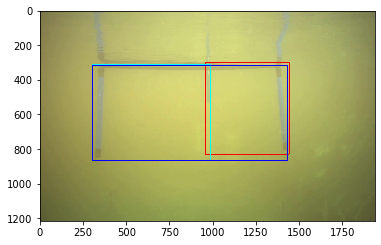

In [92]:
cv2.rectangle(img, (954, 301), (954+485, 301+529),(255,0,0), 3)
cv2.rectangle(img, (303, 316), (303+684, 316+553),(0,255,255), 3)
cv2.rectangle(img, (303, 318), (303+1125, 318+551),(0,0, 255), 3)
plt.imshow(img)

In [91]:
cv2.destroyAllWindows()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [29]:
def convert_to_yolo(img_path, x1, y1, width, height):
    image = cv2.imread(img_path)
    image_width = image.shape[1]
    image_height = image.shape[0]
    x_center = (x1+width/2)/image_width
    y_center = (y1+height/2)/image_height
    rel_width = width/image_width
    rel_height = height/image_height
    return x_center, y_center, rel_width, rel_height

In [163]:
x,y,z,k = convert_to_yolo('1200_images_renamed_final/path_images/path_247.jpg', 344, 170, 470, 377)

print(x)
print(y)
print(z)
print(k)
print(convert_to_yolo('1200_images_renamed_final/path_images/path_247.jpg', 344, 170, 470, 377))

0.3015625
0.33194444444444443
0.24479166666666666
0.3490740740740741
(0.3015625, 0.33194444444444443, 0.24479166666666666, 0.3490740740740741)


In [18]:
def yolo_to_coord(x, y, width, height, img_path):
    image = cv2.imread(img_path)
    img_w = image.shape[1]
    img_h = image.shape[0]
    x1, y1 = int((x + width/2)*img_w), int((y + height/2)*img_h)
    x2, y2 = int((x - width/2)*img_w), int((y - height/2)*img_h)
    return x1, y1, x2, y2

In [19]:
q,w,e,r = yolo_to_coord(x, y, z, k, '1200_images_renamed_final/path_images/path_247.jpg')

print(q)
print(w)
print(e)
print(r)

814
547
344
169


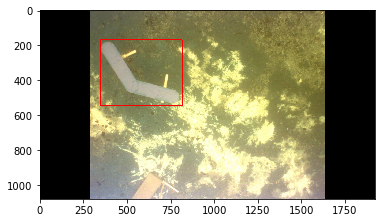

In [20]:
cv2.rectangle(img, (q, w), (e, r), (255,0,0), 3)
plt.imshow(img)

In [221]:
def class_to_index(class_name):
    if class_name == "small_gate":
        return 0
    elif class_name == "big_gate":
        return 1
    elif class_name == "total_gate":
        return 2
    elif class_name == "path":
        return 3

In [24]:
!ls

 1200_images_combined
 1200_images_renamed_final
'1200_images_renamed_final - Copy'
 final_labels_skipped_104_total_1119.csv
 images
 images_exclude_safe
 images_removed_every_other_frame_1000_safe
 load_csv_remove_skipped_files_test.ipynb
 remove_every_other_frame.ipynb
 rename_files.ipynb
 split_video.ipynb
'video src'
 yolo_labels


In [105]:
print(len(label_dict))

1119


1119
Red = Small Gate
Yellow = Big Gate
Purple = Path
Green = Marker


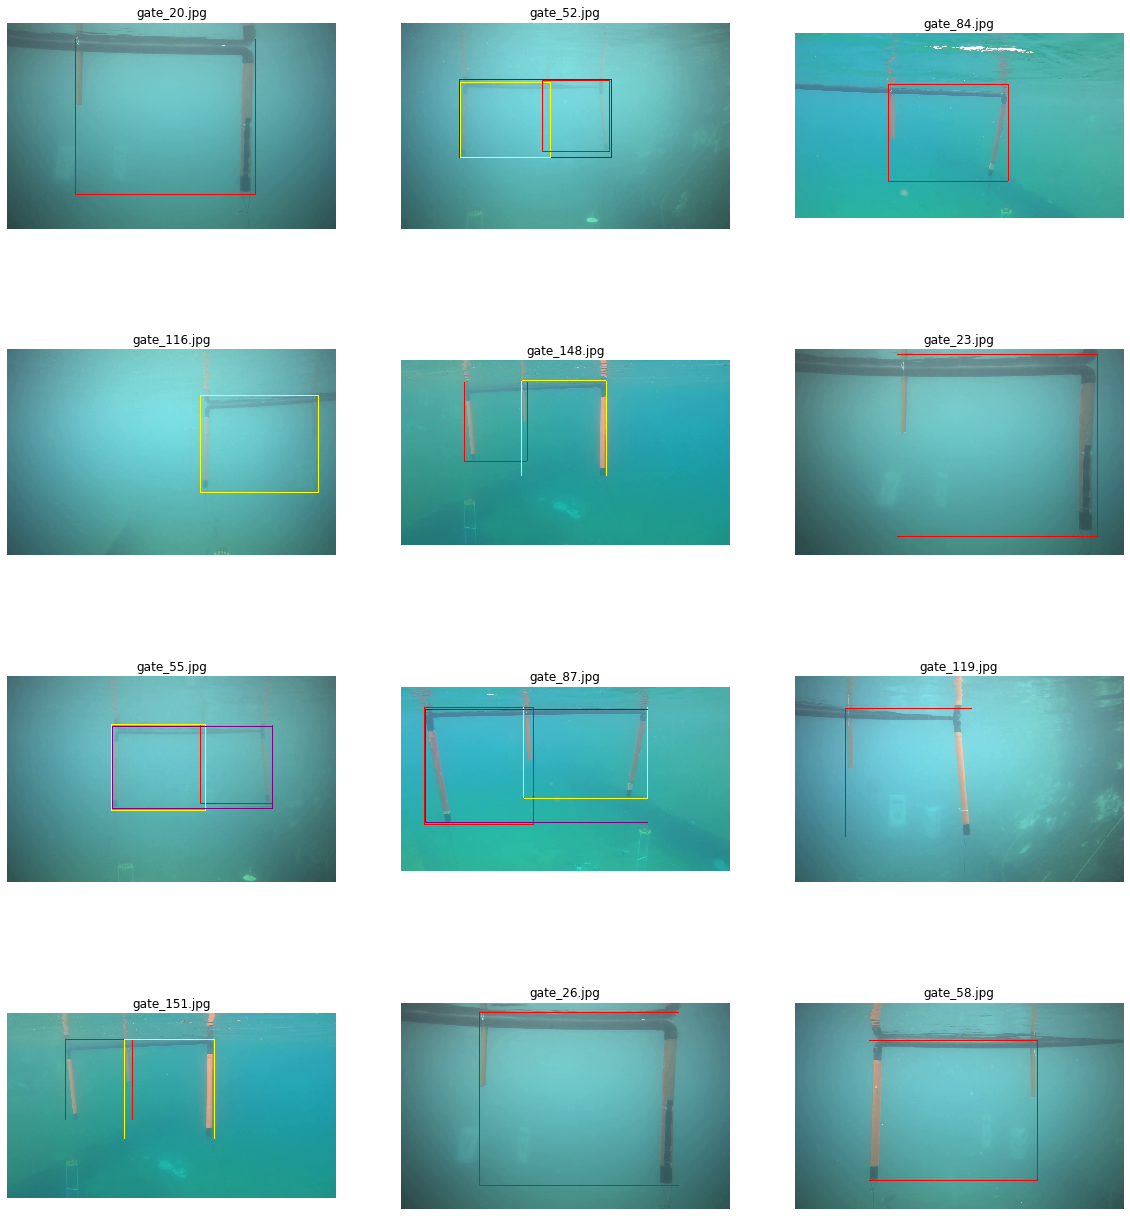

In [222]:
dir_path = os.path.join('1200_images_renamed_final', 'all_images_together')
# text_file = open('')
plt.figure(figsize=(20,600))
print(len(label_dict))
print("Red = Small Gate")
print("Yellow = Big Gate")
print("Purple = Path")
print("Green = Marker")

for i, key in enumerate(label_dict):
#     print(key)
    plt.subplot(100,3,i+1)
    plt.grid(False)
    plt.axis('off')
    img_path = os.path.join(dir_path, key)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for value in label_dict[key]['objects']:
        
        x = int(value['bbox']['left'])
        y = int(value['bbox']['top'])
        width = int(value['bbox']['width'])
        height = int(value['bbox']['height'])
        class_name = value['title']
        
        x2 = x+width
        y2 = y+height
        
        draw_rect(class_name, img, x, y, x2, y2)
        
#         print(convert_to_yolo(img_path, x, y, width, height))
#         print(img_path)
#         print ('{} {} {} {} {}'.format(class_to_index(value['title']), convert_to_yolo(img_path, x, y, width, height)))
#         print(value)
#         print(value['title'])
#         print(class_to_index(value['title']))
#         print(value['bbox'])
#     print('test')
    plt.title(key)
    plt.imshow(img)
    if i > 10: 
        break

plt.show()

In [156]:
def draw_rect(class_name, img, x1, y1, x2, y2):
    if class_name == "total_gate":
        cv2.rectangle(img, (x1, y1), (x2, y2),(128,0,128), 3)
    elif class_name == "small_gate":
        cv2.rectangle(img, (x1, y1), (x2, y2),(255,0,0), 3)
    elif class_name == "big_gate":
        cv2.rectangle(img, (x1, y1), (x2, y2),(255,255,0), 3)
    elif class_name == "path":
        cv2.rectangle(img, (x1, y1), (x2, y2),(0,255,0), 3)

In [198]:
!ls

 1119_images_final
 1200_images_combined
 1200_images_renamed_final
'1200_images_renamed_final - Copy'
 final_labels_skipped_104_total_1119.csv
 images
 images_exclude_safe
 images_removed_every_other_frame_1000_safe
 load_csv_remove_skipped_files_test.ipynb
 remove_every_other_frame.ipynb
 rename_files.ipynb
 split_video.ipynb
'video src'
 yolo_labels


# Remove skipped files from folder:

In [191]:
label_data_skipped

ID                 DataRow ID  \
External ID                                                          
gate_29.jpg   ck5jsi1u3siwv0770cgkkyh8l  ck5jatd0a41ge0doqfew60ukp   
gate_35.jpg   ck5jsw1q72lzl0a564x8h0fya  ck5jatd0a41h20doqg2di1o24   
gate_38.jpg   ck5jt4jq935iy0850cvbtutuq  ck5jatd0b41he0doq2e1p9e2j   
gate_41.jpg   ck5jt8pug2neg0a56uo3q67x4  ck5jatd0b41hq0doqgzbs1rcg   
gate_44.jpg   ck5jtbs5t2nt50a565vpgp6la  ck5jatd0b41i20doq6a3y85l2   
...                                 ...                        ...   
gate_296.jpg  ck5k0xq64xdzr0835ats0q9vn  ck5jatd1242a20doq180yfb7f   
gate_270.jpg  ck5k16p853o0g0a56ay2zmfs0  ck5jatd1142760doqbvqh61uz   
gate_273.jpg  ck5k189m7hkku0929wnqspy8p  ck5jatd11427i0doqc6vuc5nu   
gate_465.jpg  ck5k1bqfqhl2i09299rkohjon  ck5jatd1j42su0doq0fnr5x20   
path_481.jpg  ck5k70hyti8yg0929wwuzkt1x  ck5javo1n44ly0doqccs57pd9   

                                                   Labeled Data Label  \
External ID                                                             
gate_29.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_35.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_38.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_41.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_44.jpg   https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
...                                                         ...   ...   
gate_296.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_270.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_273.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
gate_465.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   
path_481.jpg  https://storage.labelbox.com/ck5ec4ea3duqe0899...    {}   

                          Created By                Project Name  \
External ID                                                        
gate_29.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_35.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_38.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_41.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_44.jpg   matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
...                              ...                         ...   
gate_296.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_270.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_273.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   
gate_465.jpg      jinsun99@yahoo.com  2020 Aquadrone Vision Data   
path_481.jpg  matthewgeng2@gmail.com  2020 Aquadrone Vision Data   

                 Created At     Updated At  Seconds to Label  Agreement  \
External ID                                                               
gate_29.jpg   1579363922000  1579363922000            73.832        NaN   
gate_35.jpg   1579364575000  1579364575000            19.021        NaN   
gate_38.jpg   1579364972000  1579364972000            64.485        NaN   
gate_41.jpg   1579365167000  1579365167000            44.802        NaN   
gate_44.jpg   1579365310000  1579365310000             2.703        NaN   
...                     ...            ...               ...        ...   
gate_296.jpg  1579378091000  1579378091000             0.896        NaN   
gate_270.jpg  1579378509000  1579378509000             0.840        NaN   
gate_273.jpg  1579378582000  1579378582000             1.988        NaN   
gate_465.jpg  1579378744000  1579378744000             5.674        NaN   
path_481.jpg  1579388298000  1579388298000             0.941        NaN   

              Benchmark Agreement  Benchmark ID  Benchmark Reference ID  \
External ID                                                               
gate_29.jpg                   NaN           NaN                     NaN   
gate_35.jpg                   NaN           NaN                     NaN   
gate_38.jpg    

In [196]:
skipped_names = label_data_skipped.index.values.tolist()
skipped_names

['gate_29.jpg',
 'gate_35.jpg',
 'gate_38.jpg',
 'gate_41.jpg',
 'gate_44.jpg',
 'gate_108.jpg',
 'gate_140.jpg',
 'gate_15.jpg',
 'gate_47.jpg',
 'gate_143.jpg',
 'gate_18.jpg',
 'gate_21.jpg',
 'gate_24.jpg',
 'gate_120.jpg',
 'gate_27.jpg',
 'gate_59.jpg',
 'gate_123.jpg',
 'gate_30.jpg',
 'gate_126.jpg',
 'gate_33.jpg',
 'gate_39.jpg',
 'gate_135.jpg',
 'gate_10.jpg',
 'gate_42.jpg',
 'gate_138.jpg',
 'gate_141.jpg',
 'gate_16.jpg',
 'gate_54.jpg',
 'gate_118.jpg',
 'gate_25.jpg',
 'gate_19.jpg',
 'gate_121.jpg',
 'gate_28.jpg',
 'gate_124.jpg',
 'gate_31.jpg',
 'gate_22.jpg',
 'gate_2.jpg',
 'gate_34.jpg',
 'gate_37.jpg',
 'gate_136.jpg',
 'gate_43.jpg',
 'gate_17.jpg',
 'gate_107.jpg',
 'gate_139.jpg',
 'gate_14.jpg',
 'gate_142.jpg',
 'gate_244.jpg',
 'gate_471.jpg',
 'gate_474.jpg',
 'gate_218.jpg',
 'gate_253.jpg',
 'gate_192.jpg',
 'gate_288.jpg',
 'gate_291.jpg',
 'gate_355.jpg',
 'gate_230.jpg',
 'gate_262.jpg',
 'gate_294.jpg',
 'gate_352.jpg',
 'gate_195.jpg',
 'gate_358.

In [213]:
cut_images_path = "1119_images_final"
for name in skipped_names:
    path_name = os.path.join(cut_images_path, name)
    print("Removed {}".format(path_name))
    os.remove(path_name)

Remove 1119_images_final/gate_29.jpg
Remove 1119_images_final/gate_35.jpg
Remove 1119_images_final/gate_38.jpg
Remove 1119_images_final/gate_41.jpg
Remove 1119_images_final/gate_44.jpg
Remove 1119_images_final/gate_108.jpg
Remove 1119_images_final/gate_140.jpg
Remove 1119_images_final/gate_15.jpg
Remove 1119_images_final/gate_47.jpg
Remove 1119_images_final/gate_143.jpg
Remove 1119_images_final/gate_18.jpg
Remove 1119_images_final/gate_21.jpg
Remove 1119_images_final/gate_24.jpg
Remove 1119_images_final/gate_120.jpg
Remove 1119_images_final/gate_27.jpg
Remove 1119_images_final/gate_59.jpg
Remove 1119_images_final/gate_123.jpg
Remove 1119_images_final/gate_30.jpg
Remove 1119_images_final/gate_126.jpg
Remove 1119_images_final/gate_33.jpg
Remove 1119_images_final/gate_39.jpg
Remove 1119_images_final/gate_135.jpg
Remove 1119_images_final/gate_10.jpg
Remove 1119_images_final/gate_42.jpg
Remove 1119_images_final/gate_138.jpg
Remove 1119_images_final/gate_141.jpg
Remove 1119_images_final/gate

In [224]:
yolo_path = 'yolo_labels/train'
dir_path = '1119_images_final'
for key in label_dict:
    key_name = os.path.splitext(key)[0] + ".txt"
    print(key_name)
    text_path = os.path.join(yolo_path, key_name)
    text_file = open(text_path, 'w')
    img_path = os.path.join(dir_path, key)
    for value in label_dict[key]['objects']:
        x = int(value['bbox']['left'])
        y = int(value['bbox']['top'])
        width = int(value['bbox']['width'])
        height = int(value['bbox']['height'])
        class_name = value['title']
        class_val = class_to_index(class_name)
        x_c, y_c, w, h = convert_to_yolo(img_path, x, y, width, height)
#         print("{} {} {} {} {}".format(class_val, x_c, y_c, w, h))
        text_file.write("{} {} {} {} {}\n".format(class_val, x_c, y_c, w, h))

gate_20.txt
gate_52.txt
gate_84.txt
gate_116.txt
gate_148.txt
gate_23.txt
gate_55.txt
gate_87.txt
gate_119.txt
gate_151.txt
gate_26.txt
gate_58.txt
gate_90.txt
gate_122.txt
gate_154.txt
gate_61.txt
gate_93.txt
gate_125.txt
gate_0.txt
gate_32.txt
gate_64.txt
gate_96.txt
gate_128.txt
gate_3.txt
gate_67.txt
gate_99.txt
gate_131.txt
gate_6.txt
gate_70.txt
gate_102.txt
gate_134.txt
gate_9.txt
gate_73.txt
gate_105.txt
gate_137.txt
gate_12.txt
gate_76.txt
gate_79.txt
gate_111.txt
gate_50.txt
gate_82.txt
gate_114.txt
gate_146.txt
gate_53.txt
gate_85.txt
gate_117.txt
gate_149.txt
gate_56.txt
gate_88.txt
gate_152.txt
gate_91.txt
gate_62.txt
gate_94.txt
gate_1.txt
gate_65.txt
gate_97.txt
gate_129.txt
gate_4.txt
gate_36.txt
gate_68.txt
gate_100.txt
gate_132.txt
gate_7.txt
gate_71.txt
gate_103.txt
gate_74.txt
gate_106.txt
gate_48.txt
gate_13.txt
gate_45.txt
gate_80.txt
gate_77.txt
gate_112.txt
gate_109.txt
gate_86.txt
gate_150.txt
gate_144.txt
gate_57.txt
gate_89.txt
gate_51.txt
gate_153.txt
gate_6

path_50.txt
path_143.txt
path_82.txt
path_114.txt
path_146.txt
path_175.txt
path_178.txt
path_210.txt
path_242.txt
path_431.txt
path_274.txt
path_306.txt
path_338.txt
path_370.txt
path_402.txt
path_434.txt
path_463.txt
path_466.txt
path_498.txt
path_530.txt
path_565.txt
path_597.txt
path_495.txt
path_629.txt
path_527.txt
path_21.txt
path_53.txt
path_562.txt
path_85.txt
path_117.txt
path_149.txt
path_594.txt
path_181.txt
path_626.txt
path_213.txt
path_245.txt
path_277.txt
path_501.txt
path_309.txt
path_533.txt
path_568.txt
path_600.txt
path_341.txt
path_632.txt
path_24.txt
path_56.txt
path_373.txt
path_88.txt
path_405.txt
path_120.txt
path_152.txt
path_184.txt
path_216.txt
path_437.txt
path_248.txt
path_280.txt
path_469.txt
path_536.txt
path_571.txt
path_312.txt
path_603.txt
path_635.txt
path_27.txt
path_59.txt
path_91.txt
path_123.txt
path_344.txt
path_155.txt
path_187.txt
path_376.txt
path_219.txt
path_408.txt
path_251.txt
path_283.txt
path_440.txt
path_315.txt
path_347.txt
path_472.t

In [218]:
for key in label_dict:
    print(key)
    for value in label_dict[key]['objects']:
        print(value)
        print(value['title'])
        print(value['bbox'])

gate_20.jpg
{'featureId': 'ck5jrnvis03id0yc6nhf37mbl', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 99, 'left': 402, 'height': 913, 'width': 1059}}
small_gate
{'top': 99, 'left': 402, 'height': 913, 'width': 1059}
gate_52.jpg
{'featureId': 'ck5jrpgve03jo11bwxhx4k2d8', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 335, 'left': 344, 'height': 461, 'width': 893}}
total_gate
{'top': 335, 'left': 344, 'height': 461, 'width': 893}
{'featureId': 'ck5jrppzh03it0yc6325rjwue', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 356, 'left': 350, 'height': 438, 'width': 531}}
big_gate
{'top': 356, 'left': 350, 'height': 438, 'width': 531}
{'featureId': 'ck5jrpxa803jt11bwuzvj2x9h', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#F

{'top': 216, 'left': 202, 'height': 181, 'width': 144}
{'featureId': 'ck5jut04t04s80yc6yxmvvl06', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 213, 'left': 38, 'height': 200, 'width': 177}}
big_gate
{'top': 213, 'left': 38, 'height': 200, 'width': 177}
{'featureId': 'ck5jut37304qz11bwm5tet3eg', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 211, 'left': 38, 'height': 202, 'width': 308}}
total_gate
{'top': 211, 'left': 38, 'height': 202, 'width': 308}
gate_259.jpg
{'featureId': 'ck5jutdkj04sc0yc6m6kbjo1y', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 485, 'left': 749, 'height': 240, 'width': 191}}
small_gate
{'top': 485, 'left': 749, 'height': 240, 'width': 191}
{'featureId': 'ck5jutii004se0yc6iwcbsje4', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate

{'featureId': 'ck5k0jh9u27av0ycz7gf5zcie', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 365, 'left': 903, 'height': 276, 'width': 257}}
big_gate
{'top': 365, 'left': 903, 'height': 276, 'width': 257}
{'featureId': 'ck5k0jjzr27aw0ycz20mquef0', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 365, 'left': 902, 'height': 296, 'width': 379}}
total_gate
{'top': 365, 'left': 902, 'height': 296, 'width': 379}
gate_313.jpg
{'featureId': 'ck5k48jcs08ru11bw3snlkyju', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 195, 'left': 843, 'height': 394, 'width': 124}}
total_gate
{'top': 195, 'left': 843, 'height': 394, 'width': 124}
gate_345.jpg
{'featureId': 'ck5k0jpfs27b10yczc8voycdz', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '

path
{'top': 881, 'left': 895, 'height': 119, 'width': 93}
gate_path_22.jpg
{'featureId': 'ck5k1yzql27y20ycziz2fjx53', 'schemaId': 'ck5jayld65aif09786uvbap06', 'title': 'small_gate', 'value': 'small_gate', 'color': '#FF0000', 'bbox': {'top': 40, 'left': 426, 'height': 363, 'width': 309}}
small_gate
{'top': 40, 'left': 426, 'height': 363, 'width': 309}
{'featureId': 'ck5k1z51007mf11bwmca36wue', 'schemaId': 'ck5jayld65aig0978k1c8x1ma', 'title': 'big_gate', 'value': 'big_gate', 'color': '#00FFFF', 'bbox': {'top': 34, 'left': 712, 'height': 442, 'width': 388}}
big_gate
{'top': 34, 'left': 712, 'height': 442, 'width': 388}
{'featureId': 'ck5k1z8y107mi11bwyfq9oxzx', 'schemaId': 'ck5jayld65aih0978o7xzfjh5', 'title': 'total_gate', 'value': 'total_gate', 'color': '#8000FF', 'bbox': {'top': 33, 'left': 424, 'height': 444, 'width': 677}}
total_gate
{'top': 33, 'left': 424, 'height': 444, 'width': 677}
{'featureId': 'ck5k1zcbv27y70yczlowiz4fj', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'pa

path
{'top': 102, 'left': 274, 'height': 118, 'width': 132}
path_426.jpg
{'featureId': 'ck5k3exo408dm11bw12s5yud6', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 137, 'left': 0, 'height': 237, 'width': 119}}
path
{'top': 137, 'left': 0, 'height': 237, 'width': 119}
path_458.jpg
{'featureId': 'ck5k3f0la28oy0yczczeox5kg', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 303, 'left': 214, 'height': 119, 'width': 106}}
path
{'top': 303, 'left': 214, 'height': 119, 'width': 106}
path_74.jpg
{'featureId': 'ck5k3f0fp08do11bwluo04h67', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 433, 'left': 482, 'height': 47, 'width': 151}}
path
{'top': 433, 'left': 482, 'height': 47, 'width': 151}
path_490.jpg
{'featureId': 'ck5k3f3zu08dq11bwa710ppv1', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value':

path_343.jpg
{'featureId': 'ck5k3wvnp08oe11bwepcolszc', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 159, 'left': 346, 'height': 186, 'width': 69}}
path
{'top': 159, 'left': 346, 'height': 186, 'width': 69}
path_375.jpg
{'featureId': 'ck5k3wyh6290c0yczhcegzcei', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 315, 'left': 187, 'height': 127, 'width': 129}}
path
{'top': 315, 'left': 187, 'height': 127, 'width': 129}
path_119.jpg
{'featureId': 'ck5k3ws5e08oc11bwo49jnvj6', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 146, 'left': 441, 'height': 650, 'width': 288}}
path
{'top': 146, 'left': 441, 'height': 650, 'width': 288}
path_407.jpg
{'featureId': 'ck5k3x1md290e0ycz72eunhi8', 'schemaId': 'ck5jayld65aii0978yax1w98q', 'title': 'path', 'value': 'path', 'color': '#2BFF00', 'bbox': {'top': 374, 'left